# Chapter 2. Supervised Learning

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

[Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) is used when we want to predict a certain outcome from a given input, and we have examples of input/output pairs.

## Classification and Regression

There are two major types of supervised machine learning problems, called [classification](https://en.wikipedia.org/wiki/Statistical_classification) and [regression](https://en.wikipedia.org/wiki/Regression_analysis).

In classification, the goal is to predit a *class label*, which is a choice from a predefined list of possibilities.  
In chapter 1 we used the example of classifying irises into one of three possible species.  
Classification is sometimes separated into *binary classification*, which is the special case of distinguishing between exactly two classes, and *multiclass classification*, which is classification between more than two classes.

For regression tasks, the goal is to predict a continuous number, a floating-point number, or a real number.  
Predicting a person's annual income from their education, their age, and where they live is an example of a regression task.  
When predicting income, the predicted value is an amount and can be any number in a given range.  
Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm.  
The yield again can be an arbitrary number.

An easy way to distinguish between classification and regression tasks is to ask whether there is some kind of continuity in the output.  
If there is continuity between possible outcomes, then the problem is a regression problem.  
Think about predicting annual income -- there is clear continuity in the output.  
Whether a person makes $50,000 or $50,001 per year doesn't make much difference, even though they are technically different dollar amounts.  
By contrast, recognizing which language a book is written in is a classification problem because there is no matter of degree.  
The book is written in English, or Arabic, or French, or some other language; there is no continuity between languages and there is no language that is *between* Arabic and French.

## Generalization, Overfitting, and Underfitting

We want to build a model that is able to generalize as accurately as possible.  
Building a model that is too complex for the amount of information available is called [overfitting](https://en.wikipedia.org/wiki/Overfitting).  
Overfitting occurs when you fit a model too closely to the particularities of the training set and come up with a model that works well on that training set but is not able to generalize to new data.  
On the other hand, if your model is too simple or whose scope is too broadly defined, then you might not be able to capture all the aspects of and variability in the data.  
This is known as [underfitting](https://en.wikipedia.org/wiki/Overfitting#Underfitting), and will result in your model performing poorly on both the training and test sets because it cannot capture the underlying trend of the data.  
You can learn more about underfitting vs. overfitting [in the scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

### Relation of Model Complexity to Dataset Size

It's important to note that model complexity is initmately tied to the variation of inputs contained in your training dataset.  
The larger the variety of data points that your dataset contains, the more complex a model you can use without overfitting.  
Usually, collecting more data points will yield more variety, so larger datasets allow you to build more complex models.  
In the real world, you often have the ability to decide how much data to collect, which might be more beneficial than tweaking and tuning your model.  

## Supervised Machine Learning Algorithms

This is where the fun begins.  
We will now review the most popular machine learning algorithms and explain how they learn from data and how they make predictions.  
This chapter can be used as a reference guide for the rest of the book.

### Some Sample Datasets

We will be using several different datasets to illustrate the various algorithms.  
Many of the algorithms will have a classification and a regression variant, and we will describe both.  

An example of a synthetic (made-up) two-class (binary) classification dataset is the `forge` dataset from the `mglearn` module.  
The following code creates a scatter plot visualizing all of the data points in the dataset.  
The plot has the first (of two) feature on the x-axis and the second feature on the y-axis.  
Each data point is represented as one dot, and the color and shape of the dot indicates its class:

In [148]:
# Generate dataset
X, y = mglearn.datasets.make_forge()
print("X:")
print(X)
print("y:")
print(y)

X:
[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]
 [  8.30988863   4.80623966]
 [ 11.93027136   4.64866327]
 [  9.67284681  -0.20283165]
 [  8.34810316   5.13415623]
 [  8.67494727   4.47573059]
 [  9.17748385   5.09283177]
 [ 10.24028948   2.45544401]
 [  8.68937095   1.48709629]
 [  8.92229526  -0.63993225]
 [  9.49123469   4.33224792]
 [  9.25694192   5.13284858]
 [  7.99815287   4.8525051 ]
 [  8.18378052   1.29564214]
 [  8.7337095    2.49162431]
 [  9.32298256   5.09840649]
 [ 10.06393839   0.99078055]
 [  9.50048972  -0.26430318]
 [  8.34468785   1.63824349]
 [  9.50169345   1.93824624]
 [  9.15072323   5.49832246]
 [ 11.563957     1.3389402 ]]
y:
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X.shape: 
(26, 2)


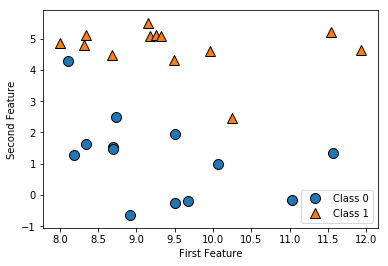

In [149]:
# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: \n{}".format(X.shape))

As you can see from `X.shape`, this dataset consists of 26 data points, with 2 features.

To illustrate regression algorithms, we will use the `synthetic wave` dataset from the `mglearn` module.  
The `wave` dataset has a single input feature and a continuous target variable (or *response*) that we want to model.  
The plot created below shows the single feature on the x-axis and the regression target (the output) on the y-axis.  

X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
y:
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4

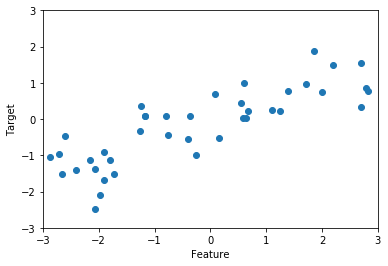

In [150]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print("X:")
print(X)
print("y:")
print(y)
plt.plot(X, y, 'o')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

We are using these very simple, low-dimensional datasets because we can easily visualize them.

We will complement these small synthetic datasets with two real-world datasets that are included in `scikit-learn`.  
One is the [Wisconsin Breast Cancer dataset](http://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-database) (aka `cancer`), which records clinical measurements of breast cancer tumors.  
Each tumor is labeled as "benign" or "malignant", and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.  
The data can be loaded using the `load_breast_cancer` function from `scikit-learn`:

In [151]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [152]:
display(cancer)

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

**Note**  
Datasets that are included in `scikit-learn` are usually stored as [Bunch objects](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/base.py), which contain some information about the dataset as well as the actual data.  
The most important thing to know about `Bunch` objects is that they behave like Python dictionaries, with the added benefit of accessing values using a dot (as in `bunch.key` instead of `bunch['key']`).

The dataset consists of 569 data points, with 30 features each:

In [153]:
print("Shape of cancer data: \n{}".format(cancer.data.shape))

Shape of cancer data: 
(569, 30)


Of these 569 data points, 212 are labeled as malignant and 357 as benign:

In [154]:
print("Sample counts per class: \n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


To get a description of the semantic meaning of each feature, we can have a look at the `feature_names` attribute:

In [155]:
print ("Feature names: \n{}".format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


You can find out more about the data by reading `cancer.DESCR` if you are interested.

In [156]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

We will also be using a real-world regression dataset, the [Boston Housing dataset](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).  
The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970's by using information such as crime rate, proximity to the Charles River, highway accessibility, and so on.  
The dataset contains 506 data points which are described by 13 features:

In [157]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: \n{}".format(boston.data.shape))

Data shape: 
(506, 13)


In [158]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called *interactions*) between features.  
In other words, we will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility.  
Including derived features like these is called [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering), which will be discussed in more detail in Chapter 4.  
This derived dataset can be loaded using the `load_extended_boston` function:

In [159]:
X, y = mglearn.datasets.load_extended_boston()
print("X:")
print(X)
print("y:")
print(y)
print("X.shape: \n{}".format(X.shape))

X:
[[  0.00000000e+00   1.80000000e-01   6.78152493e-02 ...,   1.00000000e+00
    8.96799117e-02   8.04248656e-03]
 [  2.35922539e-04   0.00000000e+00   2.42302053e-01 ...,   1.00000000e+00
    2.04470199e-01   4.18080621e-02]
 [  2.35697744e-04   0.00000000e+00   2.42302053e-01 ...,   9.79579831e-01
    6.28144504e-02   4.02790570e-03]
 ..., 
 [  6.11892474e-04   0.00000000e+00   4.20454545e-01 ...,   1.00000000e+00
    1.07891832e-01   1.16406475e-02]
 [  1.16072990e-03   0.00000000e+00   4.20454545e-01 ...,   9.82676920e-01
    1.29930407e-01   1.71795127e-02]
 [  4.61841693e-04   0.00000000e+00   4.20454545e-01 ...,   1.00000000e+00
    1.69701987e-01   2.87987643e-02]]
y:
[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20

The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13.  
We will use the above datasets to explain and illustrate the properties of the different machine learning algorithms.  
But for now, let's get to the algorithms themselves.  
First, we'll revisit the `k`-nearest neighbors (KNN) algorithm that we saw in the previous chapter.

### k-Nearest Neighbors

The KNN algorithm is arguably the simplest machine learning algorithm.  
Building the model consists only of storing the training dataset.  
To make a prediction for a new data point, the algorithm finds the `k` closest data points in the training set -- its "nearest neighbors".

#### k-Neighbors classification

In it s simplest version, the KNN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.  
The prediction is then simply the known output for this training point.  
Let's illustrate this for the case of classification on the `forge` dataset:

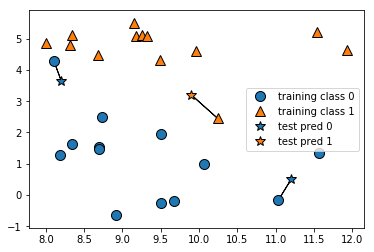

In [160]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as stars.  
For each of them, we marked the closest point in the training set.  
The prediction of the one-nearest-neighbor algorithm is the label of that point (shown by the color of the cross).

Instead of only considering the only the closest neighbor, we can also consider an arbitrary number, `k`, of neighbors.  
When considering more than one neighbor, we use *voting* to assign a label.  
This means that for each test point, we count how many neighbors belog to class 0 and how many neighbors belong to class 1.  
We then assign the class that is more frequent -- the majority class among the *k*-nearest neighbors.  
The following example uses the three closest neighbors:

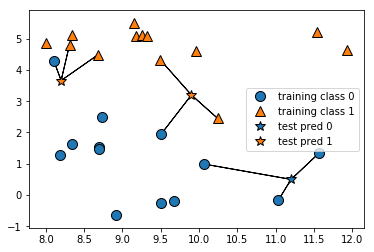

In [161]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

You can see that the prediction for the new data point at the top left is different from the prediction that was made using only one neighbor.  
While this illustration is for a binary classification problem, this method can be applied to datasets with any number of classes.  
For more classes, we count how many neighbors belong to each class and again predict the most common class.  

Now let's look at how we can apply the *k*-nearest neighbors algorithm using `scikit-learn`.  
First, we split our data into a training and a test set so we can evaluate generalization performance, as discussed in Chapter 1:

In [162]:
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Next, we import and instantiate the class.  
This is where we can set parameters, like the number of neighbors to use.  
Here, we're going to set the number of neighbors to 3:

In [163]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set.  
For [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) this means storing the dataset, so we can compute neighbors during prediction:

In [164]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, we call the `predict` method.  
For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [165]:
print("Test set predictions: \n{}".format(clf.predict(X_test)))

Test set predictions: 
[1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the `score` method with the test data together with the test labels:

In [166]:
print("Test set accuracy: \n{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 
0.86


Here we see that our model is about 86% accurate, meaning that the model predicted the class correctly for 86% of the samples in the test dataset. 

#### Analyzing KNeighborsClassifier

For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane.  
We color the plane according to the class that would be assigned to a point that lies in this region.  
This lets us view the [decision boundary](https://en.wikipedia.org/wiki/Decision_boundary), which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.  
The following code produces the visualizations of the decision boundaries for one, three, and nine neighbors:

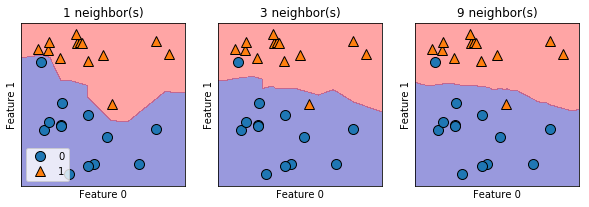

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # The fit method returns the object self, so we can instantiate and fit in one line.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

As we can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely.  
Considering more and more neighbors leads to a smoother decision boundary.  
A smoother boundary corresponds to a simpler model.  
In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity.

Let's investigate whether we can confirm the connection between model complexity and generalization that was discussed earlier.  
We will do this on the real-world Breast Cancer dataset.  
We begin by splitting the data into a training set and a test set.  
Then we evaluate training and test set performance with different numbers of neighbors.  

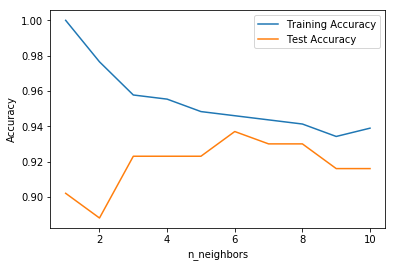

In [168]:
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# Try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Build model 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generaliztion accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting.  
Considering a single nearest neighbor, the prediction on the training set is perfect.  
When more neighbors are considered, the model becomes simpler and the training accuracy drops.  
The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex.  
On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse.  
The best performance is somewhere in the middle, using around 6 neighbors.

#### k-neighbors regression

There is also a regression variant of the KNN algorithm.  
Again, let's start by using the single nearest neighbor, this time using the `wave` dataset.  
We've added three test data points as green stars on the x-axis.  
The prediction using a single neighbor is just the target value of the nearest neighbor.  
These predictions are shown as blue stars in the following plot:

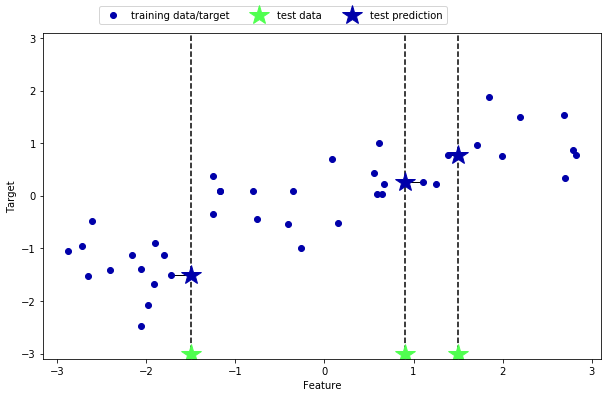

In [169]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

We can use more than the single closest neighbor for regression.  
When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors:

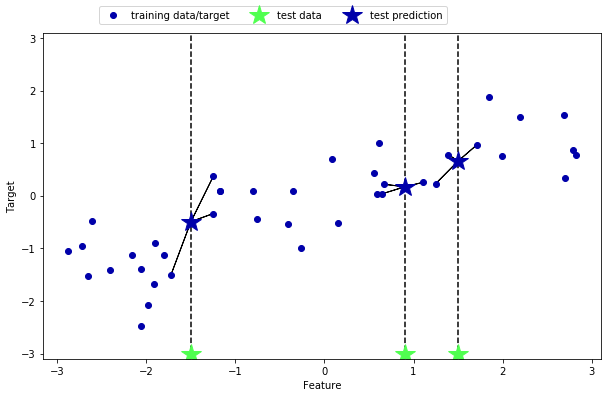

In [170]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The KNN algorithm for regression is implemented in the [KNeighborsRegressor class](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) in `scikit-learn`.  
It's used similarly to KNeighborsClassifier:

In [171]:
from sklearn.neighbors import KNeighborsRegressor 

X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the wave dataset into a training and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model and set the number of neighbors to consider to 3.
reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training targets.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

Now we can make predictions of the test set:

In [172]:
print("Test set predictions: \n{}".format((reg.predict(X_test).round(3))))

Test set predictions: 
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


We can also evaluate the model using the [score method](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score), which for regressors returns the $R^{2}$ score.  
The $R^{2}$ score, also known as the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), is a measure of how well a prediction fits a regression model, and yields a score between 0 and 1.  
A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, `y_train`.

In [173]:
print("Test set R^2: \n{:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 
0.83


Here, the score is 0.83, which indicates a relatively good model fit.

#### Analyzing KNeighborsRegressor

For our one-dimensional dataset, we can see what the predictions look like for all possible feature values.  
To do this, we create a test dataset consistiong of many points on the x-axis, which corresponds to the single feature:

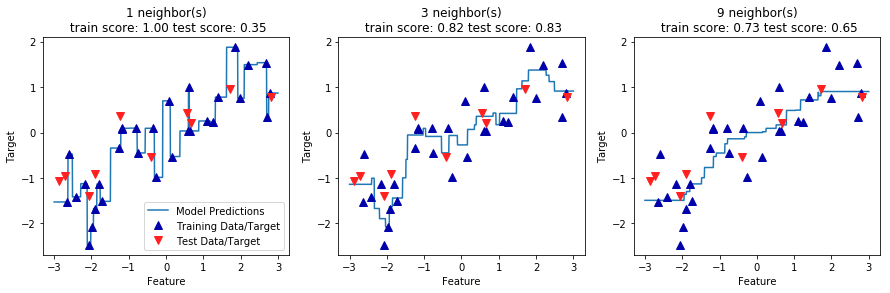

In [174]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Create 1000 data points, evenly spaced between -3 and 3.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Make predictions using 1, 3, or 9 neighbors.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predictions", "Training Data/Target", "Test Data/Target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points.  
This leads to a very unsteady prediction.  
Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

#### Strengths, weaknesses, and parameters

In principle, there are two important parameters to the `KNeighbors` classifier: the number of neighbors and how you measure distance between data points.  
The KNN model is very easy to understand and implement, but prediction is slow when the training set is large, and datasets with many features (especially sparse datasets) can cause KNN to perform poorly.

### Linear Models

[Linear models](https://en.wikipedia.org/wiki/General_linear_model) make a prediction using a [linear function](http://www.columbia.edu/itc/sipa/math/linear.html) of the input features, which will be explained shortly.  

#### Linear models for regression

For regression, the general prediction formula for a linear model looks as follows:  

$ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$

Here, $x[0]$ to $x[p]$ denotes the features (in this example, the number of features is `p+1`) of a single data point, $w$ and $b$ are the parameters of the model that are learned, and $ŷ$ is the prediction the model makes.  
For a dataset with a single feature, this is:  

$ŷ = w[0] * x[0] + b$  

which is the equation for a line.  
Here, $w[0]$ is the slope and $b$ is the y-axis offset.  
For more features, $w$ contains the slopes along each feature axis.  
Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be positive or negative) given by the entries of $w$.  

Trying to learn the parameters $w[0]$ and $b$ on our one-dimensional `wave` dataset might lead to the following line:

w[0]: 0.393906  b: -0.031804


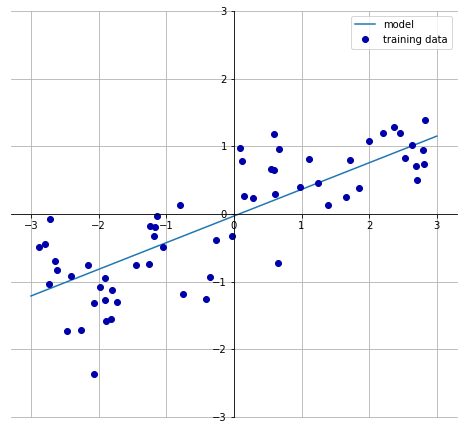

In [175]:
mglearn.plots.plot_linear_regression_wave()

A coordinate cross has been added to the plot to make it easier to understand the line.  
Looking at $w[0]$ we see that the slope should be around 0.4, which can be confirmed visually in the plot.  
The intercept is where the prediction line should cross the y-axis: this is slightly below zero, which can also be confirmed visually in the plot.

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (when using more features).  
If you compare the predictions made by the straight line with those made by the `KNeighborsRegressor` model, using a straight line to make predictions seems very restrictive.  
It looks like all the fine details of the data are lost.  
In a sense, this is true.  
It is a strong (and somewhat unrealistic) assumption that our target $y$ is a linear combination of the features.  
But looking at one-dimensional data gives a somewhat skewed perspective.  
For datasets with many features, linear models can be very powerful.  
In particular, if you have more featuures than training data points, any target $y$ can be perfectly modeled (on the training set) as a linear function.  

There are many different linear models for regression.  
The difference between these models lies in how the model parameters $w$ and $b$ are learned frorm the training data, and how model complexity can be controlled.  
We will now take a look at the most popular linear models for regression.  

#### Linear regression (aka ordinary least squares)